<a href="https://colab.research.google.com/github/DAWEENOT/data_science_bootcamp_8/blob/main/amazon_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Dataset from Kaggle
***
### **Features**
- **product_id**: Product ID
- **product_name**: Name of the Product
- **category**: Category of the Product
- **discounted_price**: Discounted Price of the Product
- **actual_price**: Actual Price of the Product
- **discount_percentage**: Percentage of Discount for the Product
- **rating**: Rating of the Product
- **rating_count**: Number of people who voted for the Amazon rating
- **about_product**: Description about the Product
- **user_id**: ID of the user who wrote review for the Product
- **user_name**: Name of the user who wrote review for the Product
- **review_id**: ID of the user review
- **review_title**: Short review
- **review_content**: Long review
- **img_link**: Image Link of the Product
- **product_link**: Official Website Link of the Product
***

In [ ]:
## import pandas & numpy
import pandas as  pd
import numpy as np

amazon_sales = pd.read_csv("amazon_sales.csv")
amazon_sales

In [ ]:
## info datafram

amazon_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   sub_category         1465 non-null   object 
 4   discounted_price     1465 non-null   float64
 5   actual_price         1465 non-null   float64
 6   net_price            1465 non-null   float64
 7   discount_percentage  1465 non-null   object 
 8   rating               1465 non-null   float64
 9   rating_total         1465 non-null   float64
 10  rating_rate_count    1465 non-null   object 
 11  rating_count         1465 non-null   object 
dtypes: float64(5), object(7)
memory usage: 137.5+ KB


In [ ]:
## NA

amazon_sales.isna().sum()

product_id             0
product_name           0
category               0
sub_category           0
discounted_price       0
actual_price           0
net_price              0
discount_percentage    0
rating                 0
rating_total           0
rating_rate_count      0
rating_count           0
dtype: int64

In [ ]:
## How many columns, rows in this datasset
amazon_sales.shape

(1465, 12)

In [ ]:
## Question 1: What is the best selling product?
    ## import pandas as pd
import pandas as pd


q1 =  amazon_sales.groupby(['product_id', 'product_name'])['net_price']\
        .agg(sum)\
        .reset_index()\
        .sort_values('net_price', ascending = False)\
        .head(5)

q1

,product_id,product_name,net_price
1078,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,61910.0
628,B08GJ57MKL,"Coway Professional Air Purifier for Home, Long...",45500.0
742,B08VB57558,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",37009.0
1270,B0BB3CBFBM,VU 138 cm (55 inches) Premium Series 4K Ultra ...,35010.0
996,B09NS5TKPN,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,33000.0


from matplotlib import pyplot as plt
q1['net_price'].plot(kind='hist', bins=20, title='net_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
q1.groupby('product_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
q1.groupby('product_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
q1['net_price'].plot(kind='line', figsize=(8, 4), title='net_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['product_name'].value_counts()
    for x_label, grp in q1.groupby('product_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('product_id')
_ = plt.ylabel('product_name')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(q1['product_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(q1, x='net_price', y='product_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(q1['product_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(q1, x='net_price', y='product_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
## Plot chart
# Question 1:

q1.plot.bar(x = 'product_name',\
            y = 'net_price',\
            legend = False)

In [ ]:
## Question 2: Which category is the best-selling?

    ## import pandas as pd
import pandas as pd

q2 = amazon_sales.groupby(['category'])['net_price']\
        .agg(sum)\
        .round()\
        .reset_index()\
        .sort_values('net_price', ascending = False)\
        .head(5)

q2

,category,net_price
2,Electronics,2188909.0
4,Home&Kitchen,820493.0
1,Computers&Accessories,380961.0
7,OfficeProducts,2964.0
0,Car&Motorbike,1661.0


In [ ]:
## Question 3: Which products have been highly rated at 5

    ## improt pandas as pd
import pandas as pd

amazon_sales[['product_name', 'rating']]\
    [amazon_sales['rating'] == 5]

,product_name,rating
174,Syncwire LTG to USB Cable for Fast Charging Co...,5.0
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",5.0
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,5.0


<Axes: xlabel='category'>

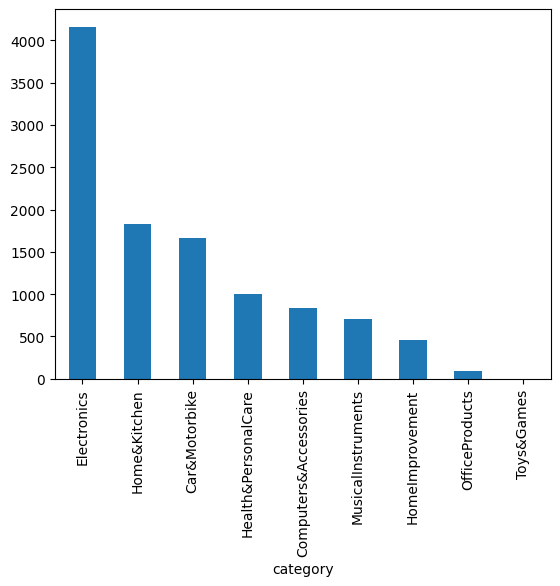

In [ ]:
## Plot chart sample
# Question 4:

amazon_sales.groupby(['category'])['net_price']\
    .mean()\
    .round()\
    .reset_index()\
    .sort_values('net_price', ascending = False)\
    .plot.bar(x = 'category',\
              y = 'net_price',\
              legend = False)

<Axes: xlabel='category'>

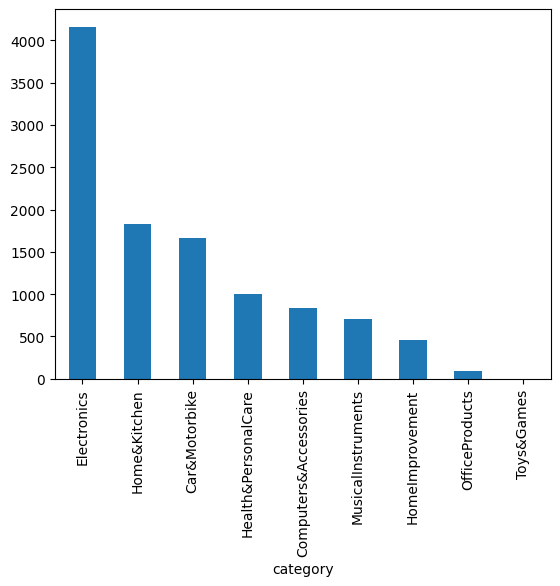

In [ ]:
## Plot chart sample
# Question 4:

amazon_sales.groupby(['category'])['net_price']\
    .mean()\
    .round()\
    .reset_index()\
    .sort_values('net_price', ascending = False)\
    .plot.bar(x = 'category',\
              y = 'net_price',\
              legend = False)

In [ ]:
## Ml for discount price

## ML
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split

## prepare data

x = amazon_sales.drop(['product_id',
                       'product_name',
                       'category',
                       'sub_category',
                       'rating_rate_count',
                       'rating_total',
                       'rating_count',
                       'discounted_price',
                       'discount_percentage'], axis=1)
y = amazon_sales['discounted_price']


## split data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)


## train model
model = BaggingRegressor()
model.fit(x_train, y_train)

## prediction

p = model.predict(x_test)

# Scoring
model.score(x_test, y_test)

0.969408939306866

In [ ]:
## ML for net price

## ML
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split

## prepare data

x = amazon_sales[['actual_price','discounted_price']]
y = amazon_sales['net_price']


## split data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)


## train model
model = BaggingRegressor()
model.fit(x_train, y_train)

## prediction

p = model.predict(x_test)

# Scoring
model.score(x_test, y_test)

0.9249694792611545